In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities

586

## Perform API Calls

In [4]:
# OpenWeatherMap API Key
api_key = api_keys.api_key


In [6]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
response = requests.get(query_url + city).json()
print(response)

{'coord': {'lon': 147.33, 'lat': -42.88}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 55.4, 'pressure': 1021, 'humidity': 66, 'temp_min': 55.4, 'temp_max': 55.4}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 330}, 'clouds': {'all': 0}, 'dt': 1538949600, 'sys': {'type': 1, 'id': 8195, 'message': 0.006, 'country': 'AU', 'sunrise': 1538854357, 'sunset': 1538900693}, 'id': 2163355, 'name': 'Hobart', 'cod': 200}


In [8]:
# Performing a GET request similar to the one we executed in class
# Temperature (F) vs. Latitude
# Humidity (%) vs. Latitude
# Cloudiness (%) vs. Latitude
# Wind Speed (mph) vs. Latitude

# set up lists to hold reponse info
# had to come back to add long, because the assignment asks to check for geographical data spread

city_list=[]
city_ct=[]
lat = []
long=[]
temp = []
humidity = []
cloudiness = []
wind_speed =[]
count=1 #assuming the count is required by looking at the info retireval txt in the heavily-redacted documentation file

# printing 
for city in cities:
    print(f"Processing Record Number {count} | {city}")
    print(query_url + str(city))
    count+=1
    

Processing Record Number 1 | punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=b5b8e679139d80559353bf1409e8296b&units=Imperial&q=punta arenas
Processing Record Number 2 | barrow
http://api.openweathermap.org/data/2.5/weather?appid=b5b8e679139d80559353bf1409e8296b&units=Imperial&q=barrow
Processing Record Number 3 | jamestown
http://api.openweathermap.org/data/2.5/weather?appid=b5b8e679139d80559353bf1409e8296b&units=Imperial&q=jamestown
Processing Record Number 4 | salekhard
http://api.openweathermap.org/data/2.5/weather?appid=b5b8e679139d80559353bf1409e8296b&units=Imperial&q=salekhard
Processing Record Number 5 | darnah
http://api.openweathermap.org/data/2.5/weather?appid=b5b8e679139d80559353bf1409e8296b&units=Imperial&q=darnah
Processing Record Number 6 | kasongo-lunda
http://api.openweathermap.org/data/2.5/weather?appid=b5b8e679139d80559353bf1409e8296b&units=Imperial&q=kasongo-lunda
Processing Record Number 7 | hovd
http://api.openweathermap.org/data/2.5/weather?appid

# Loop through the list of cities and perform a request for data on each
#this is without explicitly counting cities

for city in cities:
    response = requests.get(query_url + city).json()
    
    try:
        lat.append(response['coord']['lat'])

    except:
        continue
    long.append(response['coord']['lon'])
    long.append(response['coord']['lon'])   
    temp.append(response['main']['temp'])
    humidity.append(response['main']['humidity'])
    cloudliness.append(response['clouds']['all'])
    wind_speed.append(response['wind']['speed'])
    city_ct.append(count)


In [9]:
# This is with explicit city count that the tutor helped me work through - the count is not necessary, I was just learning...
# Loop through the list of cities and perform a request for data on each
# pull the first 10 records to check if it looks right
# this is with count, which is not really necessary but good to learn
rows=[]
count=1

# printing 10 looks like this for city in cities[:10]:
for city in cities:
    response = requests.get(query_url + city).json()
    
    try:
        
        lat=response['coord']['lat']
        long=response['coord']['lon']
        temp=response['main']['temp']
        humidity=response['main']['humidity']
        cloudiness=response['clouds']['all']
        wind_speed=response['wind']['speed']
        
        rows.append([count, city, lat, long, temp, humidity, cloudiness, wind_speed])
        count+=1
    except:
        continue
    

rows

In [12]:
weather_df=pd.DataFrame(rows, columns=["Count", "City", "Latitude", "Longitude", "Temperature", "Humidity", "Cloudiness", "Wind Speed"])
weather_df.to_csv("output.csv", index=False, header=True)
weather_df.head(10)

,Count,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,1,punta arenas,-53.16,-70.91,42.80,91,40,19.46
1,2,barrow,-38.31,-60.23,74.69,36,56,16.22
2,3,jamestown,-33.21,138.60,70.55,33,88,14.76
3,4,salekhard,66.54,66.62,31.89,87,0,11.63
4,5,darnah,32.77,22.64,74.42,100,8,5.26
5,6,kasongo-lunda,-6.48,16.82,67.22,99,88,2.13
6,7,hovd,63.83,10.70,46.40,49,0,26.40
7,8,faanui,-16.48,-151.75,77.70,100,76,9.95
8,9,kenai,60.55,-151.26,49.98,76,90,2.57
9,10,boende,-0.28,20.88,71.22,96,64,2.57


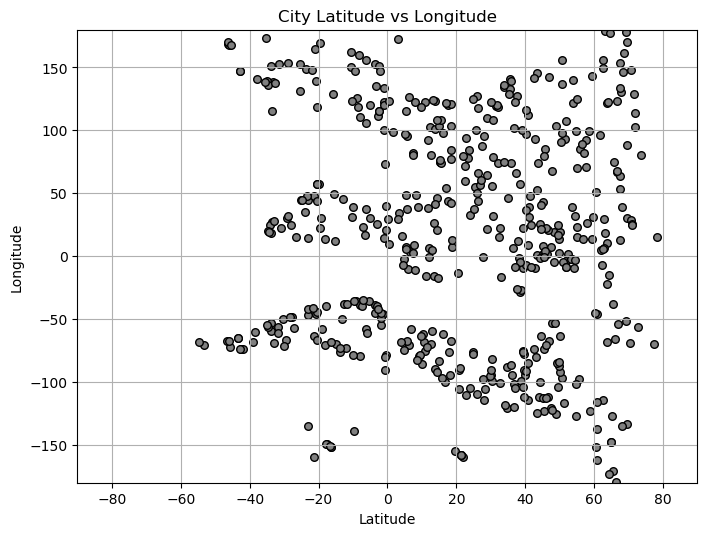

In [14]:
#scatter plot city lat(y) vs long(x) to check the geographic spread - this wasn't requested, but the question was asked...
#Save both a CSV of all data retrieved and png images for each scatter plot

plt.figure(figsize=(8, 6), dpi=100)
plt.scatter(weather_df["Latitude"], weather_df["Longitude"], marker="o", color='gray', edgecolor='black', s=30)

title = ("City Latitude vs Longitude")
plt.title(title)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.xlim(-90,90)
plt.ylim(-180,180)
plt.grid(True)

plt.savefig('city_geospread.png')
plt.show()



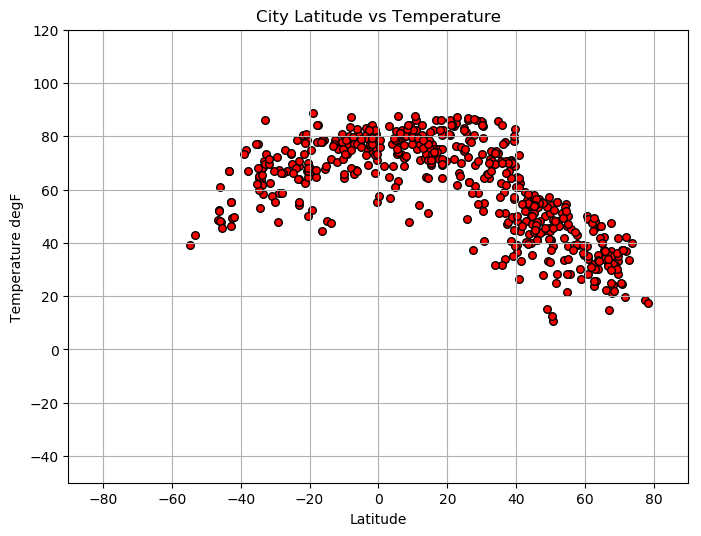

In [15]:
# scatter plat city latitude vs temp

plt.figure(figsize=(8, 6), dpi=100)
plt.scatter(weather_df["Latitude"], weather_df["Temperature"], marker="o", color='r', edgecolor='black', s=30)

title = ("City Latitude vs Temperature")
plt.title(title)
plt.xlabel("Latitude")
plt.ylabel("Temperature degF")
plt.xlim(-90,90)
plt.ylim(-50,120)
plt.grid(True)
plt.savefig('city_temp.png')

plt.show()


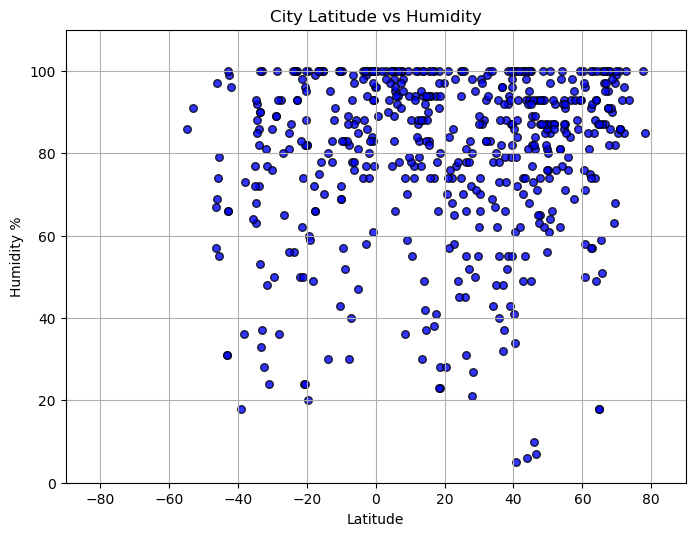

In [16]:
#scatter plot latitude vs humidity

plt.figure(figsize=(8, 6), dpi=100)
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker="o", color='b', edgecolor='black', alpha=0.8, s=30)

title = ("City Latitude vs Humidity")
plt.title(title)
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.xlim(-90,90)
plt.ylim(0,110)
plt.grid(True)
plt.savefig('city_humidity.png')
plt.show()

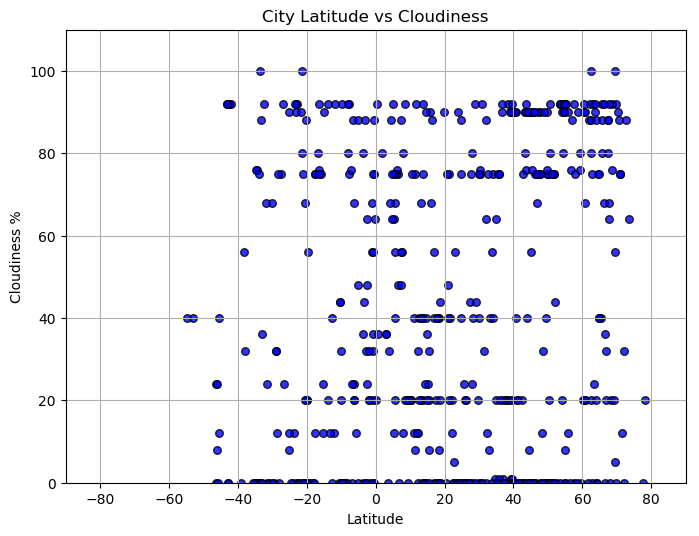

In [17]:
#scatter plot latitude vs cloudiness

plt.figure(figsize=(8, 6), dpi=100)
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker="o", color='b', edgecolor='black', alpha=0.8, s=30)

title = ("City Latitude vs Cloudiness")
plt.title(title)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.xlim(-90,90)
plt.ylim(0,110)
plt.grid(True)
plt.savefig('city_cloudiness.png')

plt.show()

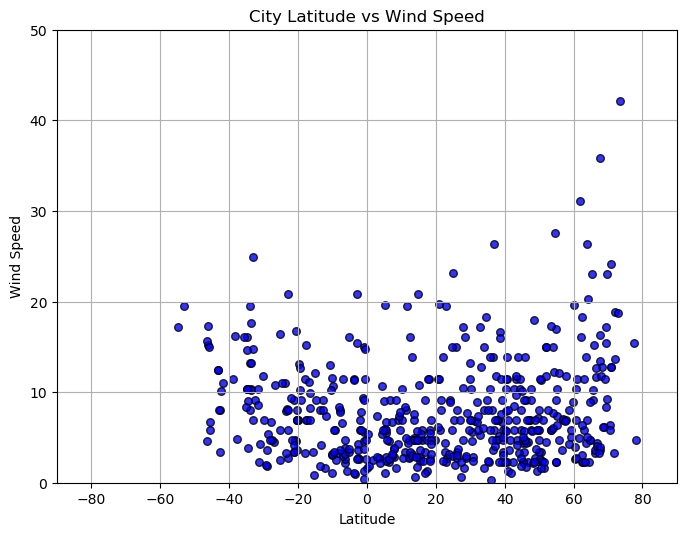

In [18]:
#scatter plot latitude vs humidity

plt.figure(figsize=(8, 6), dpi=100)
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker="o", color='b', edgecolor='black', alpha=0.8, s=30)

title = ("City Latitude vs Wind Speed")
plt.title(title)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.xlim(-90,90)
plt.ylim(0,50)
plt.grid(True)
plt.savefig('city_windspeed.png')

plt.show()